In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
server_dir = '/home/robbie/uit_mnt/'
ice_cover_dir = f'{server_dir}/home/romal7177/arctex/ice_cover/'

site = 'austfonna'
radius = 300


df = pickle.load(open(f'{ice_cover_dir}{radius}/cover_all_{site}.p','rb'))

df['doy'] = [x.timetuple().tm_yday for x in df['dt']]

max_cover = np.nanmax(df['cover'])

df['norm'] = df['cover']/max_cover

df.sort_values('dt',inplace=True)

df

,cover,year,month,day,dt,doy,norm
0,274.2687,2003,1,1,2003-01-01,1,0.783677
1,273.9901,2003,1,2,2003-01-02,2,0.782881
2,272.5089,2003,1,3,2003-01-03,3,0.778648
3,277.4973,2003,1,4,2003-01-04,4,0.792902
4,270.6140,2003,1,5,2003-01-05,5,0.773234
...,...,...,...,...,...,...,...
7665,257.4833,2023,12,27,2023-12-27,361,0.735715
7666,249.3055,2023,12,28,2023-12-28,362,0.712348
7667,239.5066,2023,12,29,2023-12-29,363,0.684350
7668,221.3767,2023,12,30,2023-12-30,364,0.632547


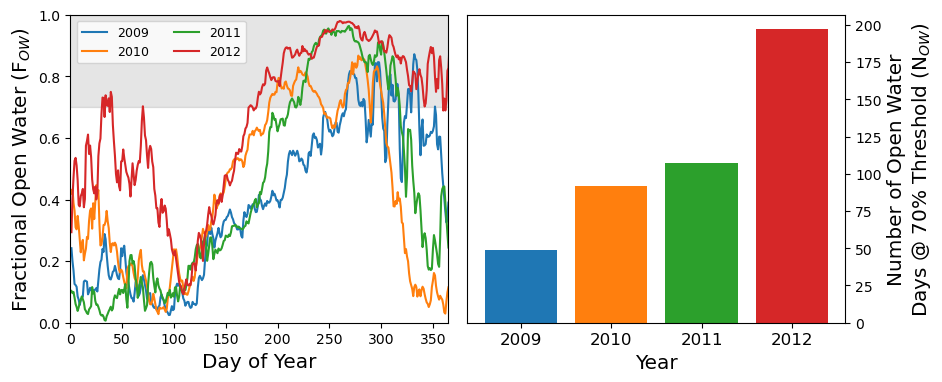

In [3]:
thresh = 0.7

nows = []
colors = []

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))

for year in np.arange(2009,2013):

    dfy = df[df['year']==year]
    df_yr=dfy
    
    df_yr = df_yr[1-df_yr['norm']>thresh]

    all_days_OW = df_yr.shape[0]

    nows.append(all_days_OW)
    
    p = ax1.plot(dfy['doy'],1-dfy['norm'],label=year)

    colors.append(p[-1].get_color())

ax1.fill_between(x=[-100,400],y1=0.7,y2=1,color='k',alpha=0.1)
ax1.legend(ncols=2,fontsize=9)
ax1.set_ylabel('Fractional Open Water (F$_{OW}$)',fontsize='x-large')
ax1.set_xlabel('Day of Year',fontsize='x-large')
ax1.set_xlim(0,365)
ax1.set_ylim(0,1)

ax2.bar(np.arange(1,5),nows,color=colors)
ax2.set_xticks(np.arange(1,5))
ax2.set_xticklabels(np.arange(2009,2013),fontsize='large')
ax2.set_ylabel('Number of Open Water\nDays @ 70% Threshold (N$_{OW}$)',fontsize='x-large')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
ax2.set_xlabel('Year',fontsize='x-large')

plt.subplots_adjust(wspace=0.05)

plt.savefig('figures/now_construction.png',dpi=500,bbox_inches='tight')